# Problem 1
## Part 1
Generate 20 random points in d = 3 from a Gaussian multivariate distribution with mean $[0, 0, 0]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.7
    \end{bmatrix}$$
    
Call this data label 1. Do the same for another Gaussian with mean $[1, 1, 1]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.01 
    \end{bmatrix}$$
    
Call this data label 2. Create a 3 d plot of the data points, labeled.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy.matlib
from sklearn.preprocessing import normalize

In [2]:
# Define variables
mu_1 = np.zeros(3)
mu_2 = np.ones(3)
var_1 = np.array([0.5, 0.5, 0.7])
var_2 = np.array([0.5, 0.5, 0.01])
cov_1 = np.multiply(np.matlib.eye(3) , var_1)
cov_2 = np.multiply(np.matlib.eye(3), var_2)
print(cov_1)
print(cov_2)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.7]]
[[0.5  0.   0.  ]
 [0.   0.5  0.  ]
 [0.   0.   0.01]]


In [3]:
# Sample the two vectors of Gaussians
label_1 = np.random.multivariate_normal(mean=mu_1, cov=cov_1, size=20)
label_2 = np.random.multivariate_normal(mean=mu_2, cov=cov_2, size=20)

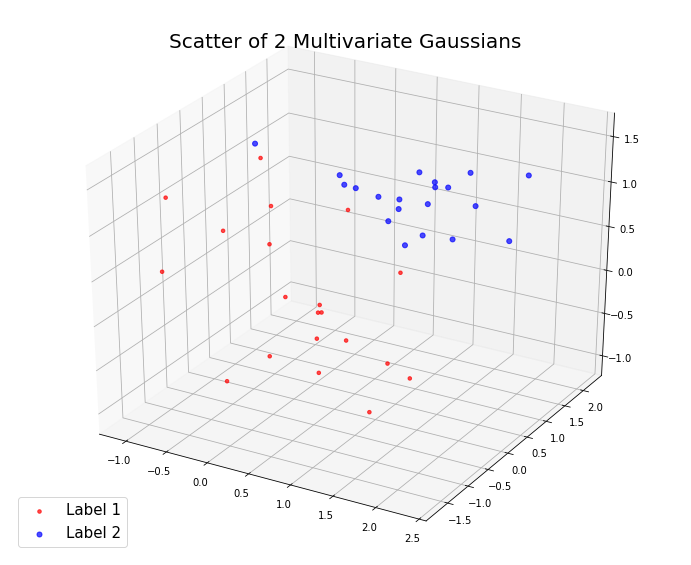

In [4]:
# Why can't python plotting be more like MATLAB plotting :(

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111, projection='3d')
_ = ax1.scatter(label_1[:,0], label_1[:,1], label_1[:,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], label_2[:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

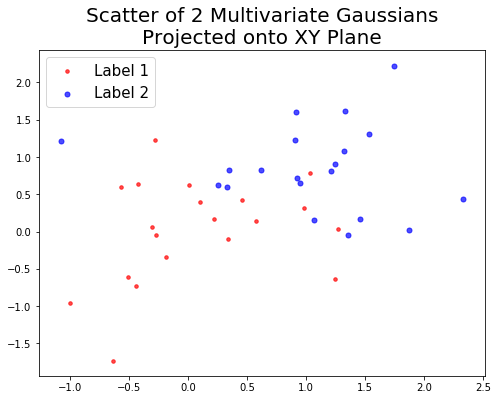

In [5]:
# Projection onto x, y plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,1], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XY Plane', FontSize=20)
_ = plt.legend(loc=2, prop={'size' : 15})

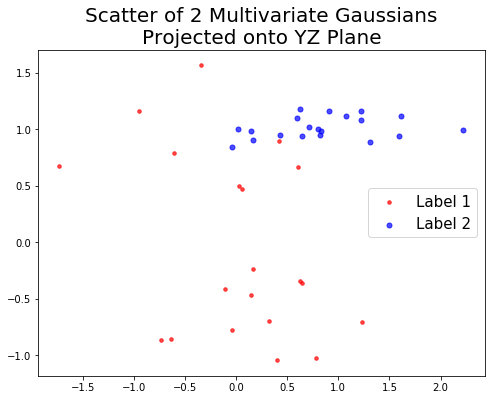

In [6]:
# Projection onto y, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,1], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,1], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto YZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

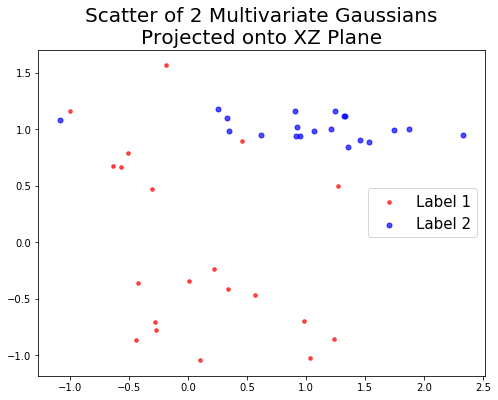

In [7]:
# Projection onto x, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

## Part 2

The points don't look like much. The label 2 points have some interesting shapes in a few directions.

## Part 3
Concatenate points and find covariance matrix

In [8]:
# Split up the distribution

G = np.vstack((label_1, label_2))
X = G[:,0]
Y = G[:,1]
Z = G[:,2]

In [9]:
# Calculate the covariance matrix by hand

def Cov(x, y):
    return np.dot(x,y)/(x.shape[0] - 1)
  
mu_1 = (np.sum(X)/X.shape[0])
mu_2 = (np.sum(Y)/Y.shape[0])
mu_3 = (np.sum(Z)/Z.shape[0])

mse_1 = abs(np.subtract(X, mu_1))
mse_2 = abs(np.subtract(Y, mu_2))
mse_3 = abs(np.subtract(Z, mu_3))

means = [mu_1, mu_2, mu_3]
mses = [mse_1, mse_2, mse_3]

cov_matrix = np.zeros((3,3))
for i in range(cov_matrix.shape[0]):
    for j in range(cov_matrix.shape[1]):
        cov_matrix[i,j] = Cov(mses[i], mses[j])

In [10]:
print(cov_matrix)
print(np.cov(G.T))

[[0.7030385  0.5016224  0.46404408]
 [0.5016224  0.57498467 0.38627101]
 [0.46404408 0.38627101 0.61511435]]
[[0.7030385  0.24424171 0.14362731]
 [0.24424171 0.57498467 0.13131449]
 [0.14362731 0.13131449 0.61511435]]


# Part 4
Using $k=2$ Find the two eigenvectors of the covariance matrix with the largest eigenvalues Project the data points onto these two vectors and show the 2d plot.

In [11]:
Lamba, V = np.linalg.eig(cov_matrix)
print(Lamba)

# Project u onto v
def proj(u, v):
    a = (np.dot(u, v))/(np.dot(u,u))
    w = a * v
    return w

[1.53904232 0.13107124 0.22302395]


In [12]:
# The two largest eigenvalues are 1 and 3, so we grab the two eigenvectors 
# associated with them. They automatically have an L2 norm == 1
v_1 = V[:,0]
v_3 = V[:,2] 

# Then we center the data. 
G_c_1 = G[:,0] - np.mean(G[:,0])
G_c_2 = G[:,1] - np.mean(G[:,1])
G_c_3 = G[:,2] - np.mean(G[:,2])
G_centered = np.column_stack((G_c_1, G_c_2, G_c_3))

projection = np.zeros((40, 3))
for i in range(G.shape[0]):
    proj_1 = np.dot(np.dot(G_centered[i,:], v_1), v_1)
    proj_2 = np.dot(np.dot(G_centered[i,:], v_3), v_3)
    tmp = proj_1 + proj_2
    projection[i,:] = tmp

#print(projection)
#print(np.mean(G_c_1))

<IPython.core.display.Javascript object>


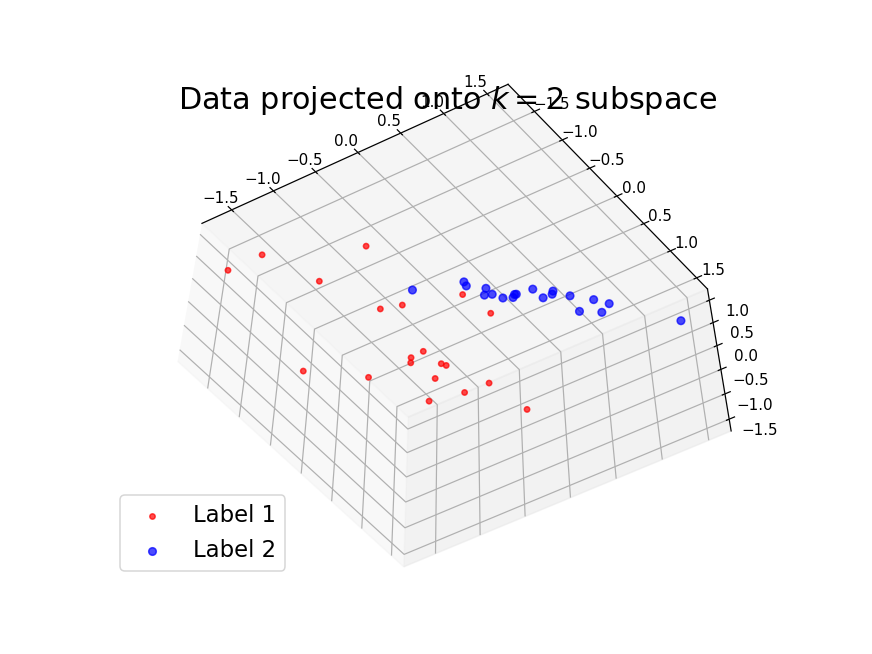

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(projection[:20,0], projection[:20,1], projection[:20,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax.scatter(projection[20:,0], projection[20:,1], projection[20:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Data projected onto $k=2$ subspace', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

for ii in range(0,360,1):
        _ = ax.view_init(elev=10., azim=ii)
        #savefig("movie%d.png" % ii)


# Problem 2

In [4]:
import imageio
from PIL import Image
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

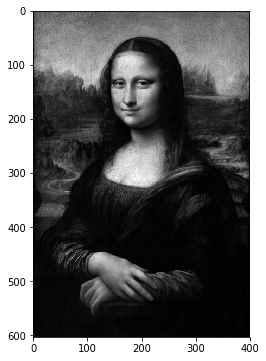

In [81]:
mona_lisa = imageio.imread('mona_lisa.png')
img = Image.open('mona_lisa.png')
imggray = img.convert('LA')
#plt.figure(figsize=(9, 6))
#plt.imshow(imggray);

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');
#print(np.count_nonzero(imgmat))
#print(imgmat.nbytes)

In [74]:
U, sigma, V = np.linalg.svd(imgmat)
non_compr_bytes = sum([matrix.nbytes for matrix in [U, sigma, V]])
print("The non-compressed byte storage is: {} bytes".format(non_compr_bytes))

The non-compressed byte storage is: 4192072 bytes


In [87]:
def k_rank(k):
    #reconstimg= np.matrix(U[:,:k]) * np.diag(sigma[:k]) * np.matrix(V[:k,:])
    U_k = np.matrix(U[:,:k])
    Sigma_k = np.diag(sigma[:k])
    V_k = np.matrix(V[:k,:])
    reconst_img= U_k * Sigma_k * V_k
    compr_bytes = sum([matrix.nbytes for matrix in [U_k, Sigma_k, V_k]])
    
    #print("Shape of U for rank {} is: {}".format(k, U_k.shape))
    #print("Shape of Sigma for rank {} is: {}".format(k, Sigma_k.shape))
    #print("Shape of V for rank {} is: {}".format(k, V_k.shape))
    #print("The compressed byte storage for rank {} is: {} bytes".format(k, compr_bytes))
    #print(reconstimg.shape)
    #plt.imshow(reconstimg,cmap='gray')
    
    return reconst_img               

### Rank 2 Approximation

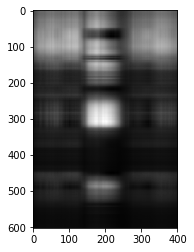

In [88]:
_ = plt.imshow(k_rank(2),cmap='gray')

### Rank 5 Approximation

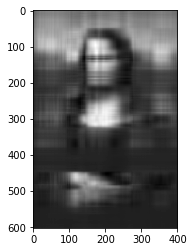

In [89]:
_ = plt.imshow(k_rank(5),cmap='gray')

### Rank 10 Approximation

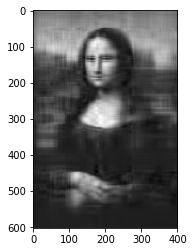

In [90]:
_ = plt.imshow(k_rank(10),cmap='gray')

### Conclusion

<p>
    The total compressed pixels needed are:
    <ul>
        <li>Rank 2: $\quad2,010 \,\, pixels$</li>
        <li>Rank 5: $\quad5,040 \,\, pixels$</li>
        <li>Rank 10: $\,\,\,10,130 \,\, pixels$</li>
    </ul>
</p>
<p>
    Then, the number of bits for each is $(pixels) * (number \, of  \, bytes) * (bits \, per \, byte)$ which is equivalent to $(pixels) * 16$
    <ul>
        <li>Rank 2: $\quad 32,160 \,\, bits$</li>
        <li>Rank 5: $\quad 80,640 \,\, bits$</li>
        <li>Rank 10: $\,\,\, 162,080 \,\, bits$</li>
    </ul>
</p>
        

## Problem 3:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

In [7]:
# Load the files
filename1 = 'CorrMat1.csv'
filename2 = 'CorrMat3.csv'

#read the files while preserving header row
df1 = pd.read_csv(filename1,header = None)
df2 = pd.read_csv(filename2,header = None)

#test to check if
print(df1.shape)
print(df2.shape)


(100, 100)
(100, 100)


## Part A:
we plan on using PCA to reduce dimensionality to 1 and preserve most of the data but also clear out the outliers and then reconstruct the matrix. We also tried to to reduce dimensionality to 2 but the reconstructed image was still capturing in that case.

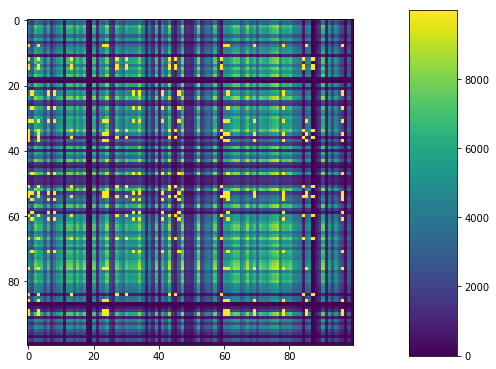

[0.73255454]


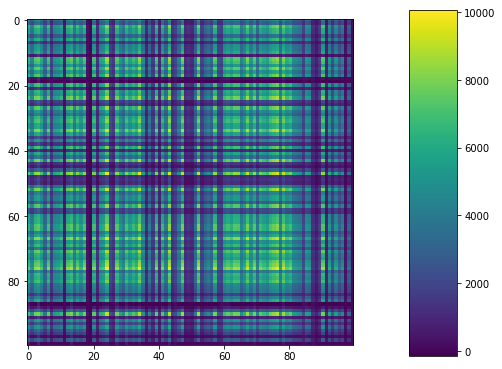

In [8]:
## plotting the original image
plt.figure(figsize=(9,6))
plt.imshow(df1);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

## does PCA analysis with 1 component aka reduces dimensionality to 1
pca = PCA(n_components = 1)
pca.fit(df1)

# to check variance preserved
print(pca.explained_variance_ratio_)


# Reducing the original matrix and then recovering by inverse transform
df1_reduced = pca.fit_transform(df1)
df1_recovered = pca.inverse_transform(df1_reduced)
plt.figure(figsize=(9,6))
plt.imshow(df1_recovered);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()


Reducing dimensionality to 1 and projecting the data again as image removed most of the outlier points and gave us a better visual. We can use the reconstructed matrix as replacement of the original matrix to replace the outliers found.

## part B
Repeating the same process as part one

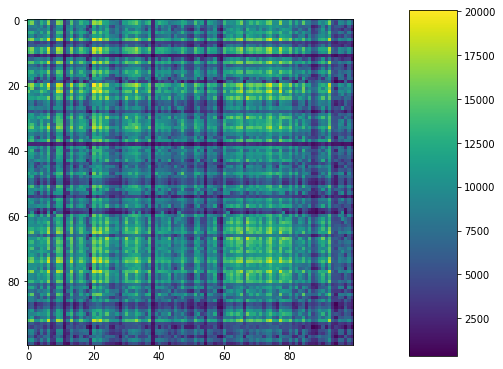

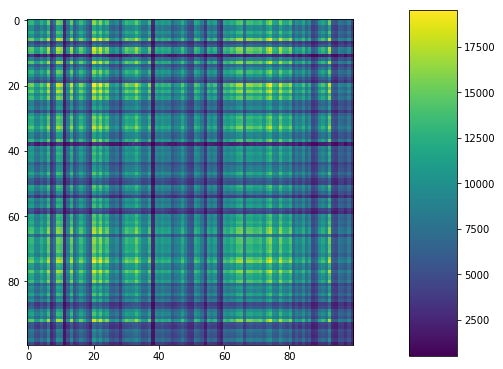

In [9]:

#plotting the original matrix
plt.figure(figsize=(9,6))
plt.imshow(df2);
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

## fitting 2nd matrix with same pca model of dimensionality 1
pca.fit(df2)



# Reducing the original matrix and then recovering by inverse transform
df2_reduced = pca.fit_transform(df2)
df2_recovered = pca.inverse_transform(df2_reduced)
plt.figure(figsize=(9,6))
plt.imshow(df2_recovered)
cax = plt.axes([0.85,0.1,0.075,0.8])
plt.colorbar(cax =cax)
plt.show()

In [10]:
## this code can check for outliers and return indexes within specified std dev
#mean = test_col.mean()
#stdev = test_col.std()
#idx = []
#for index,value in test_col.iteritems():
#    if (value < (mean-1.4*stdev))or(value>(mean+1.4*stdev)):
#                idx.append(index)
###finding outlier index
#def find_outlier_index(column):
#    mean = column.mean(axis=0)
#    stdev = column.std(axis=0)
#    print(mean)
#    print(column.index)
#    print(row.index)
#df1.apply(find_outlier_index,axis =0)

# Problem 4

## Load and clean libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

def rmse_cv(model, log=False):
    if log == True:
        rmse= np.sqrt(-cross_val_score(model, X_train_log, y_log, scoring="neg_mean_squared_error", cv = 5))
        return(rmse)
    else:
        rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
        return(rmse)

def makePlot(cv_model, alphas, line=True):
    plt.figure(figsize = (10,8))
    _ = plt.plot(alphas, cv_model[0,:], marker='.', label = solvers[0])
    _ = plt.plot(alphas, cv_model[1,:], marker=',', label = solvers[1])
    _ = plt.plot(alphas, cv_model[2,:], marker='o', label = solvers[2])
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("RMSE", fontsize=12)
    #if line == True:
        #xposition = alphas[np.argmin(cv_model[0,:])]
        #plt.axvline(x=xposition, color='k', linestyle='--')
        #plt.text(xposition + 0.08, 0.1375, 'Minimum Alpha', rotation=0)
    _ = plt.title("Alpha vs. RMSE for different Alphas, Solvers", fontsize=15)
    _ = plt.legend()

In [2]:
# Load data, create regular data and logspace data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

################################################################
# Create log space data
################################################################


train_log = train.copy()
test_log = test.copy()

# all_data is the original clean data
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

all_data_log = all_data.copy()
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})

#log transform the target:
train_log["SalePrice"] = np.log1p(train_log["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data_log[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data_log = pd.get_dummies(all_data_log)

#filling NA's with the mean of the column:
all_data_log = all_data_log.fillna(all_data_log.mean())
smaller_data_log = all_data_log.loc[:, ['OverallQual', 'YearRemodAdd', 
                                'YearBuilt', '1stFlrSF', 'GarageArea', 
                                'GrLivArea']]

#creating matrices for part 1 (with all columns):
X_train_log_orig = all_data_log[:train.shape[0]]
X_test_log_orig = all_data_log[train.shape[0]:]
# note these are non log space 
y_log_orig = train_log.SalePrice

#creating matrices for sklearn:
X_train_log = smaller_data_log[:train.shape[0]]
X_test_log = smaller_data_log[train.shape[0]:]
y_log = train.SalePrice

####################################################################
# Create non-log data set
###################################################################
all_data = pd.get_dummies(all_data)
smaller_data = all_data.loc[:, ['OverallQual', 'YearRemodAdd', 
                                'YearBuilt', '1stFlrSF', 'GarageArea', 
                                'GrLivArea']]
# Clean zeros and NaN
smaller_data.isnull().sum()
smaller_data = smaller_data.fillna(0)
smaller_data.isnull().sum()

#creating matrices for sklearn:
X_train = smaller_data[:train.shape[0]]
X_test = smaller_data[train.shape[0]:]
y = train.SalePrice

#### Check correlation of prepared data

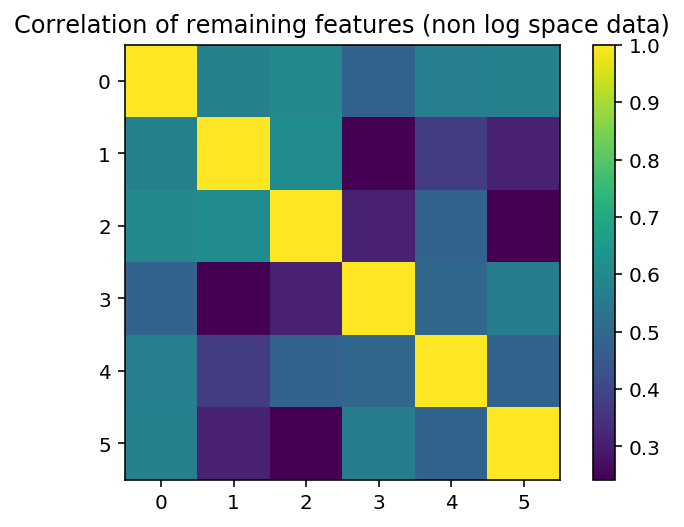

In [3]:
fig, ax = plt.subplots()
plt.imshow(smaller_data.corr())
_ = plt.colorbar()
_ = plt.title('Correlation of remaining features (non log space data)')
#_ = ax.set_xticks(smaller_data.columns.values)
#_ = ax.set_yticklabels(smaller_data.columns.values)

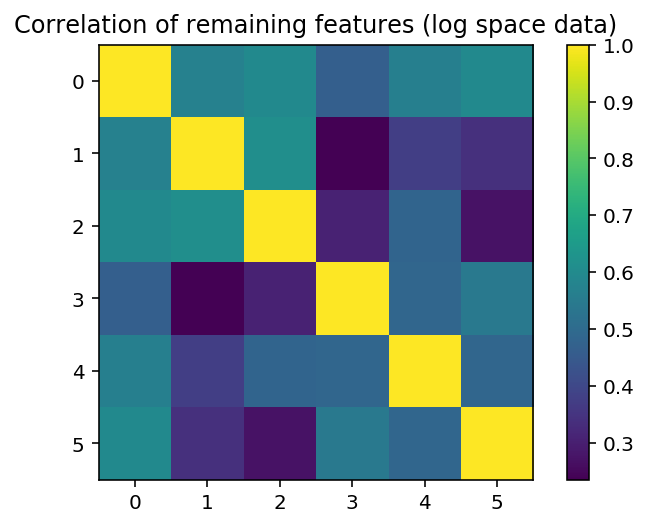

In [4]:
fig, ax = plt.subplots()
plt.imshow(smaller_data_log.corr())
_ = plt.colorbar()
_ = plt.title('Correlation of remaining features (log space data)')
#_ = ax.set_xticks(smaller_data.columns.values)
#_ = ax.set_yticklabels(smaller_data.columns.values)

## Testing different solvers, alphas, and models

### Ridge Regression (Modified)

In [5]:
###########################################################
# Test different solvers and alphas for Ridge Regression
##########################################################
solvers = ['svd', 'cholesky', 'lsqr']
num_alphas = 11
alphas_1 = [0.001*1.5**x for x in range(num_alphas)]

cv_ridge_1 = [[rmse_cv(Ridge(alpha = alpha, normalize=True, solver= solver)).mean() 
            for alpha in alphas_1] for solver in solvers]
cv_ridge_1 = np.array(cv_ridge_1)

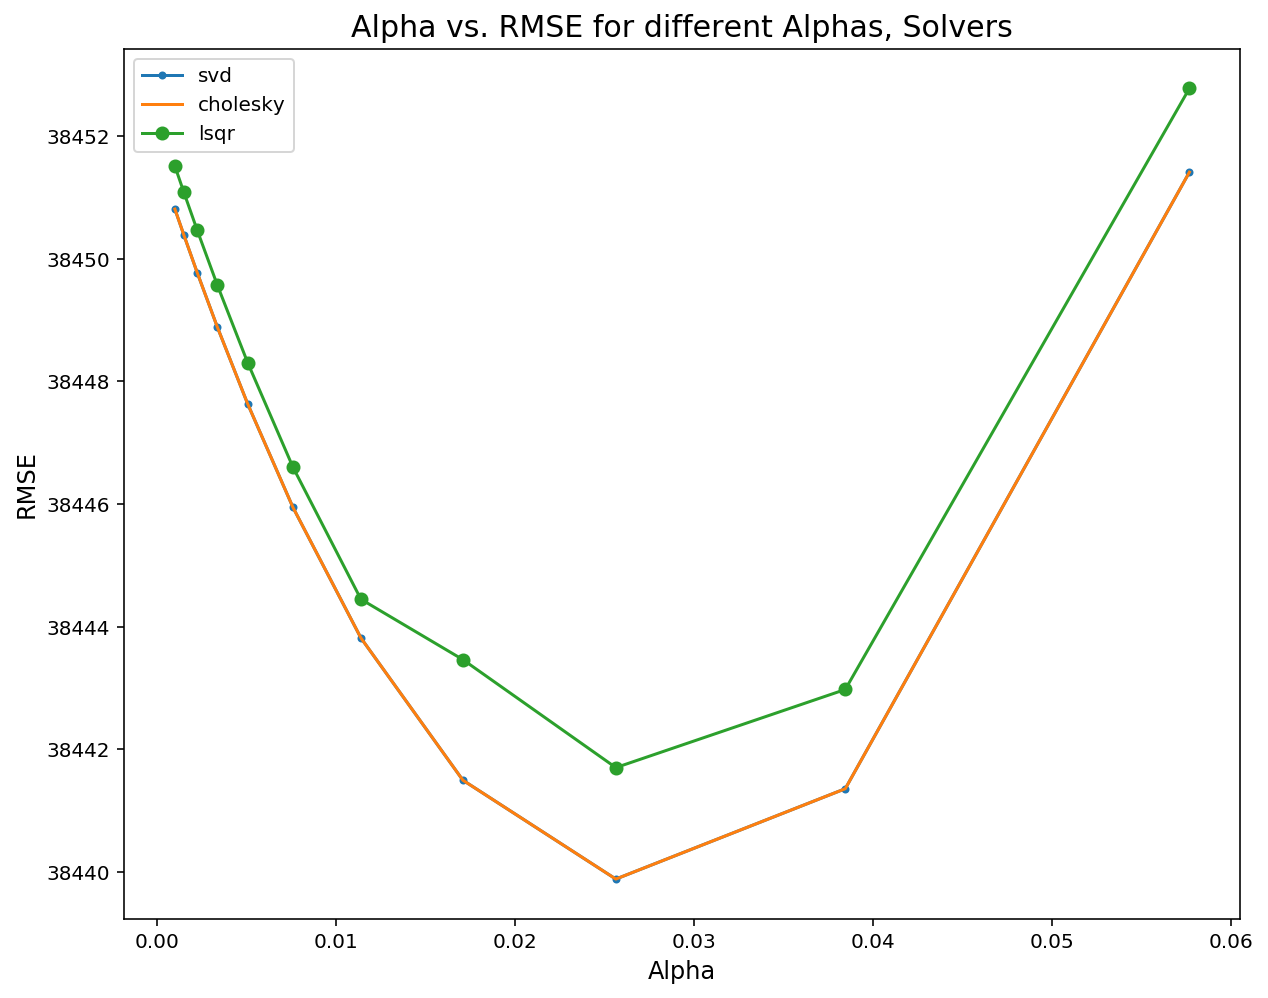

In [6]:
makePlot(cv_ridge_1, alphas_1)

In [7]:
###########################################################
# Zoom in on alphas
##########################################################
solvers = ['svd', 'cholesky', 'lsqr']
num_alphas_2 = 18
alphas_2 = np.arange(0.02, 0.04, 0.001)

cv_ridge_2 = [[rmse_cv(Ridge(alpha=alpha, normalize=True, solver= solver)).mean() 
            for alpha in alphas_2] for solver in solvers]
cv_ridge_2 = np.array(cv_ridge_2)

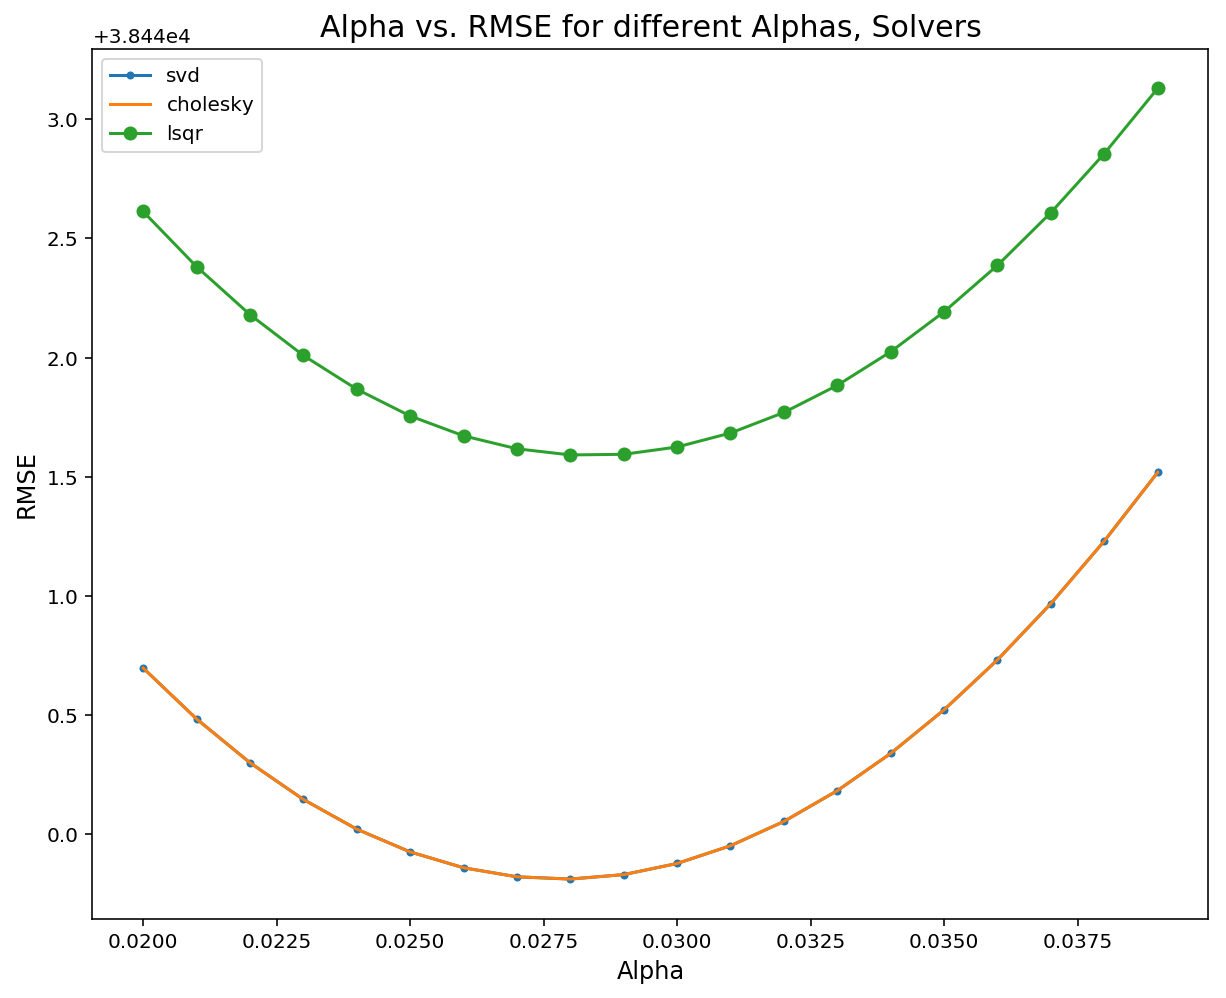

In [8]:
makePlot(cv_ridge_2, alphas_2)

#### Make Ridge predictions and write to file

In [9]:
l2_reg = alphas_2[np.argmin(cv_ridge_2[1,:])]
print(l2_reg)

0.028000000000000008


In [10]:
# We can see alpha value 0.28 gives us the lowest error
model_ridge = Ridge(alpha=0.28, normalize=True)
model_ridge.fit(X_train, y)
_ = model_ridge.predict(X_test)
new_index = np.arange(1461,2920,1)
index = pd.DataFrame(new_index, columns=['Id'])
y_hat = pd.DataFrame(_, columns=['SalePrice'])
frames = [index, y_hat]
pred = pd.concat(frames, axis=1)
pred.head()

,Id,SalePrice
0,1461,130966.838287
1,1462,155596.371077
2,1463,172261.040075
3,1464,187505.863397
4,1465,217125.799041


In [11]:
filename = 'prediction-ridge.csv'
pred.to_csv(filename, encoding='utf-8', index=False)

### Lasso Model (Modified)

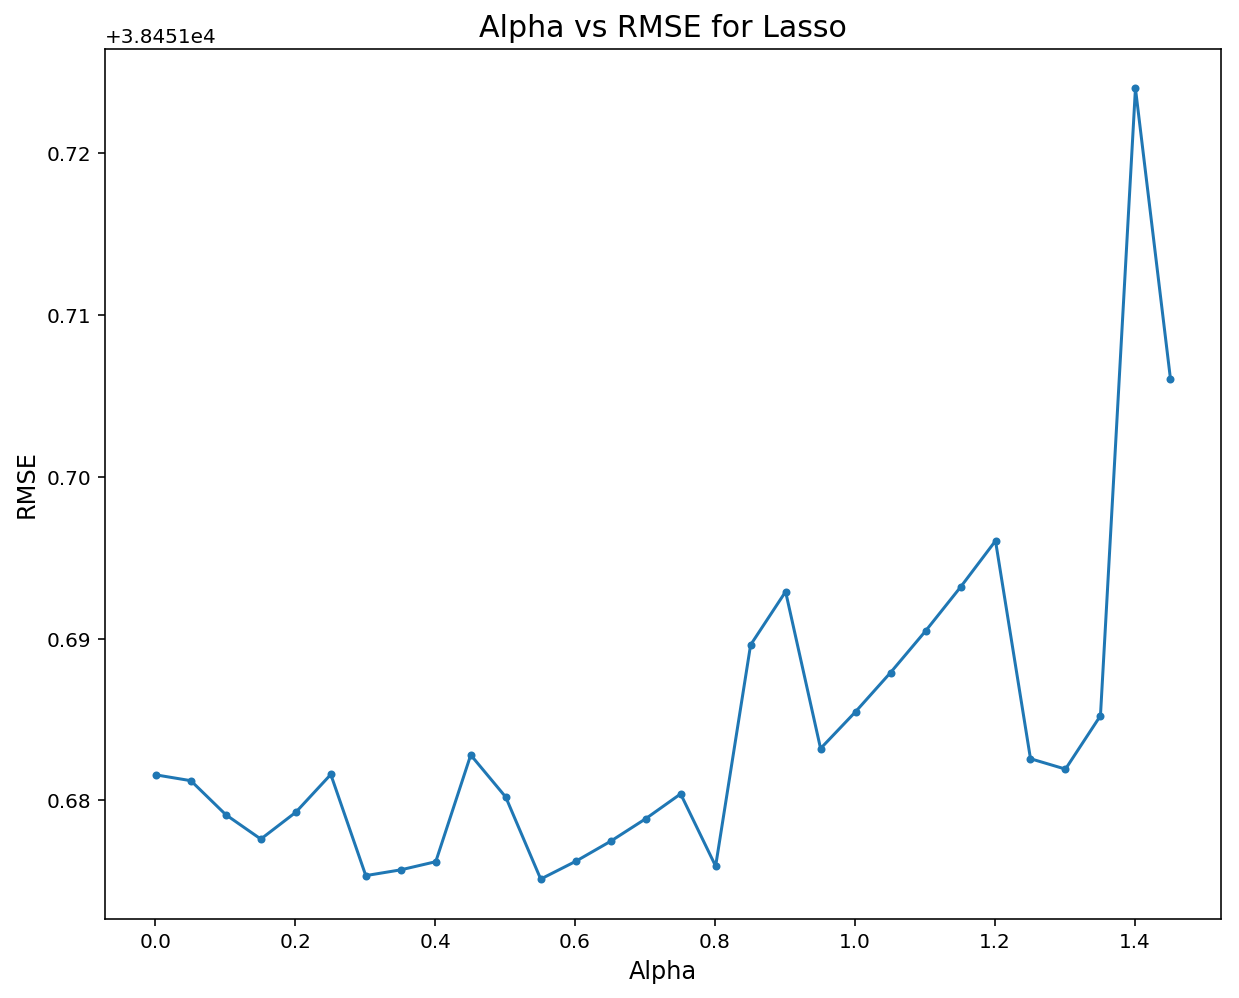

In [12]:
###########################################################
# Test different alphas for Lasso Regression
##########################################################
alphas_3 = np.arange(0.001, 1.5, 0.05)

cv_lasso = [rmse_cv(Lasso(alpha=alpha,normalize = True)).mean() 
            for alpha in alphas_3]
cv_lasso = np.array(cv_lasso)

plt.figure(figsize = (10,8))
_ = plt.plot(alphas_3, cv_lasso, marker='.')
plt.xlabel("Alpha", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
_ = plt.title("Alpha vs RMSE for Lasso", fontsize=15)

#### Make Lasso predictions and write to file

In [13]:
l1_reg = alphas_3[np.argmin(cv_lasso)]
print(l1_reg)

0.551


In [14]:
model_lasso = Lasso(alpha=0.551, normalize=True)
model_ridge.fit(X_train_log, y_log)
y_hat = model_ridge.predict(X_test_log)
new_index = np.arange(1461,2920,1)
index = pd.DataFrame(new_index, columns=['Id'])
y_hat = pd.DataFrame(y_hat, columns=['SalePrice'])
frames = [index, y_hat]
pred = pd.concat(frames, axis=1)
pred.head()

,Id,SalePrice
0,1461,129352.816565
1,1462,160894.119226
2,1463,174019.166295
3,1464,189935.955202
4,1465,222995.982704


In [15]:
pred.loc[pred["SalePrice"] < 0, "SalePrice"] = pred["SalePrice"].mean()
print(pred[pred["SalePrice"]<0])

Empty DataFrame
Columns: [Id, SalePrice]
Index: []


In [16]:
filename = 'prediction-lasso.csv'
pred.to_csv(filename, encoding='utf-8', index=False)

## Plot $L^0$ Norm

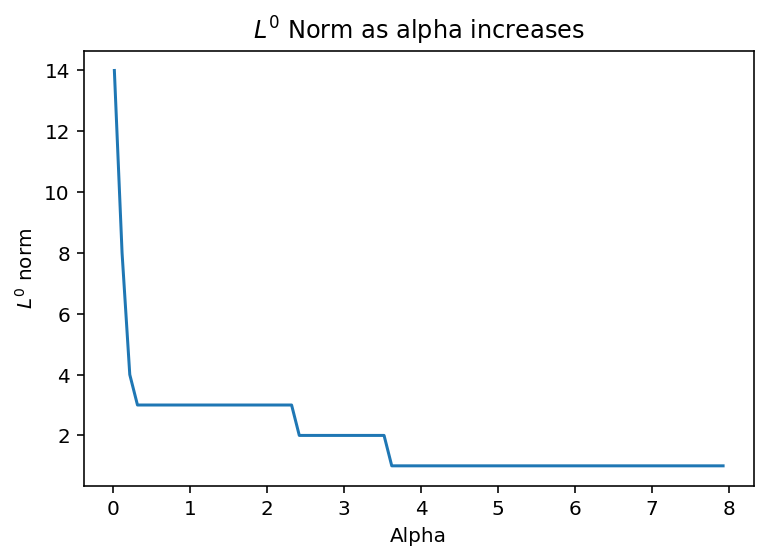

In [17]:
alphas_4 = np.arange(0.02, 8, 0.1)
nonzero = []
coeffs = []
for alpha in alphas_4:
    model = Lasso(alpha= alpha)
    model.fit(X_train_log_orig, y_log_orig)
    coeffs = model.coef_
    nonzero.append(len([coeff for coeff in coeffs if coeff != 0]))
    
plt.plot(alphas_4, nonzero)
plt.xlabel("Alpha")
plt.ylabel("$L^0$ norm")
_ = plt.title("$L^0$ Norm as alpha increases")
plt.show()

## XGBoost

In [18]:
boosters = ['gbtree', 'gblinear', 'dart']
etas = np.arange(0.001, 0.8, 0.01)

cv_xgboost = [[rmse_cv(XGBRegressor(learning_rate=eta, booster=booster)).mean() 
            for eta in etas] for booster in boosters]

cv_xgboost = np.array(cv_xgboost)

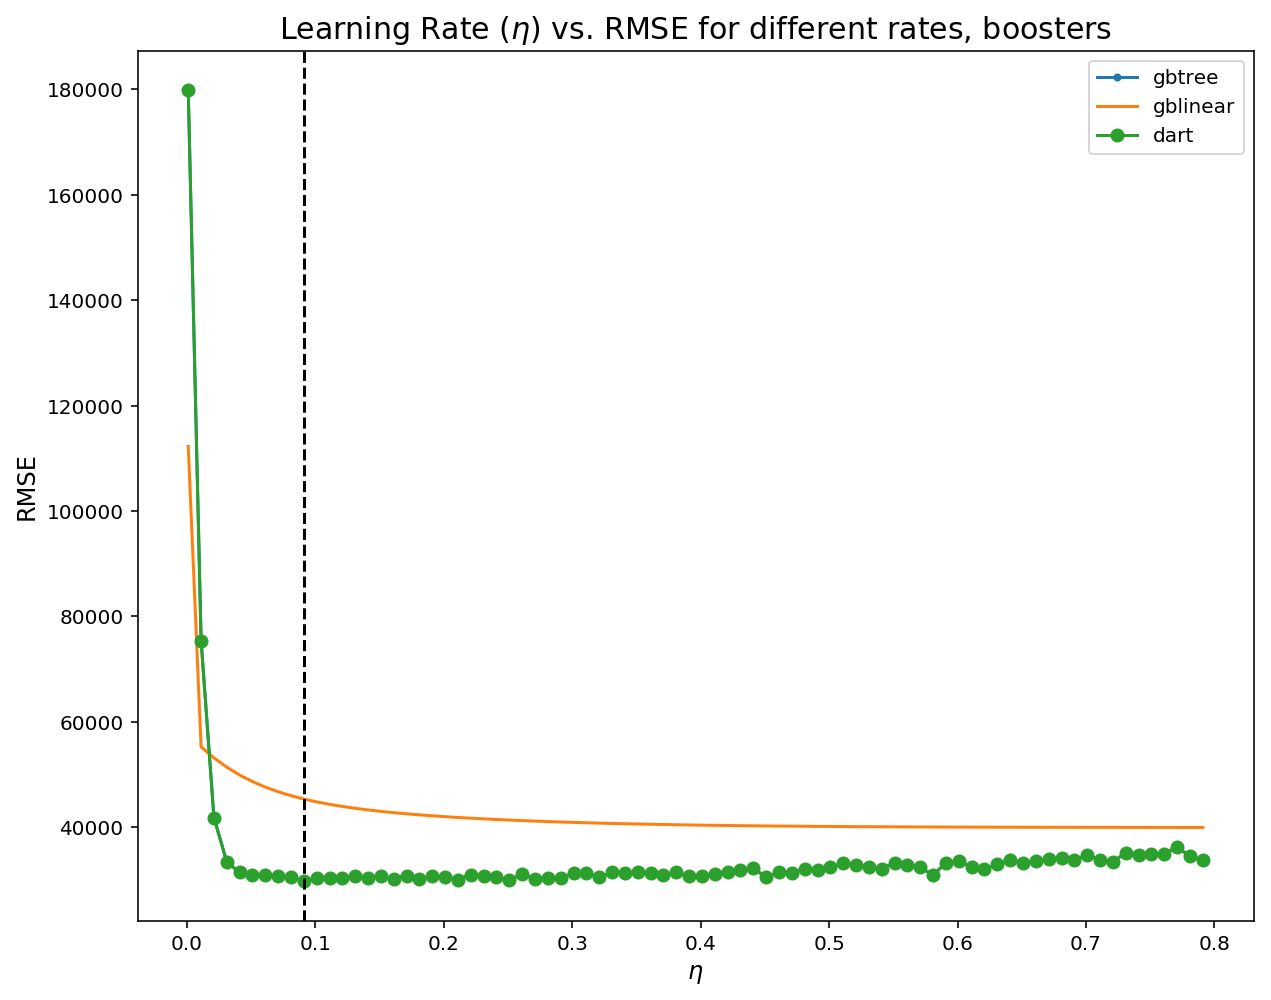

In [19]:
plt.figure(figsize = (10,8))
_ = plt.plot(etas, cv_xgboost[0,:], marker='.', label = boosters[0])
_ = plt.plot(etas, cv_xgboost[1,:], marker=',', label = boosters[1])
_ = plt.plot(etas, cv_xgboost[2,:], marker='o', label = boosters[2])
plt.xlabel("$\eta$", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
xposition = etas[np.argmin(cv_xgboost[2,:])]
plt.axvline(x=xposition, color='k', linestyle='--')
        #plt.text(xposition + 0.08, 0.1375, 'Minimum Alpha', rotation=0)
_ = plt.title("Learning Rate ($\eta$) vs. RMSE for different rates, boosters", fontsize=15)
_ = plt.legend()

In [20]:
boosters = ['gbtree', 'dart']
etas = np.arange(0.01, 0.2, 0.01)

cv_xgboost = [[rmse_cv(XGBRegressor(learning_rate=eta, booster=booster)).mean() 
            for eta in etas] for booster in boosters]

cv_xgboost = np.array(cv_xgboost)

0.12


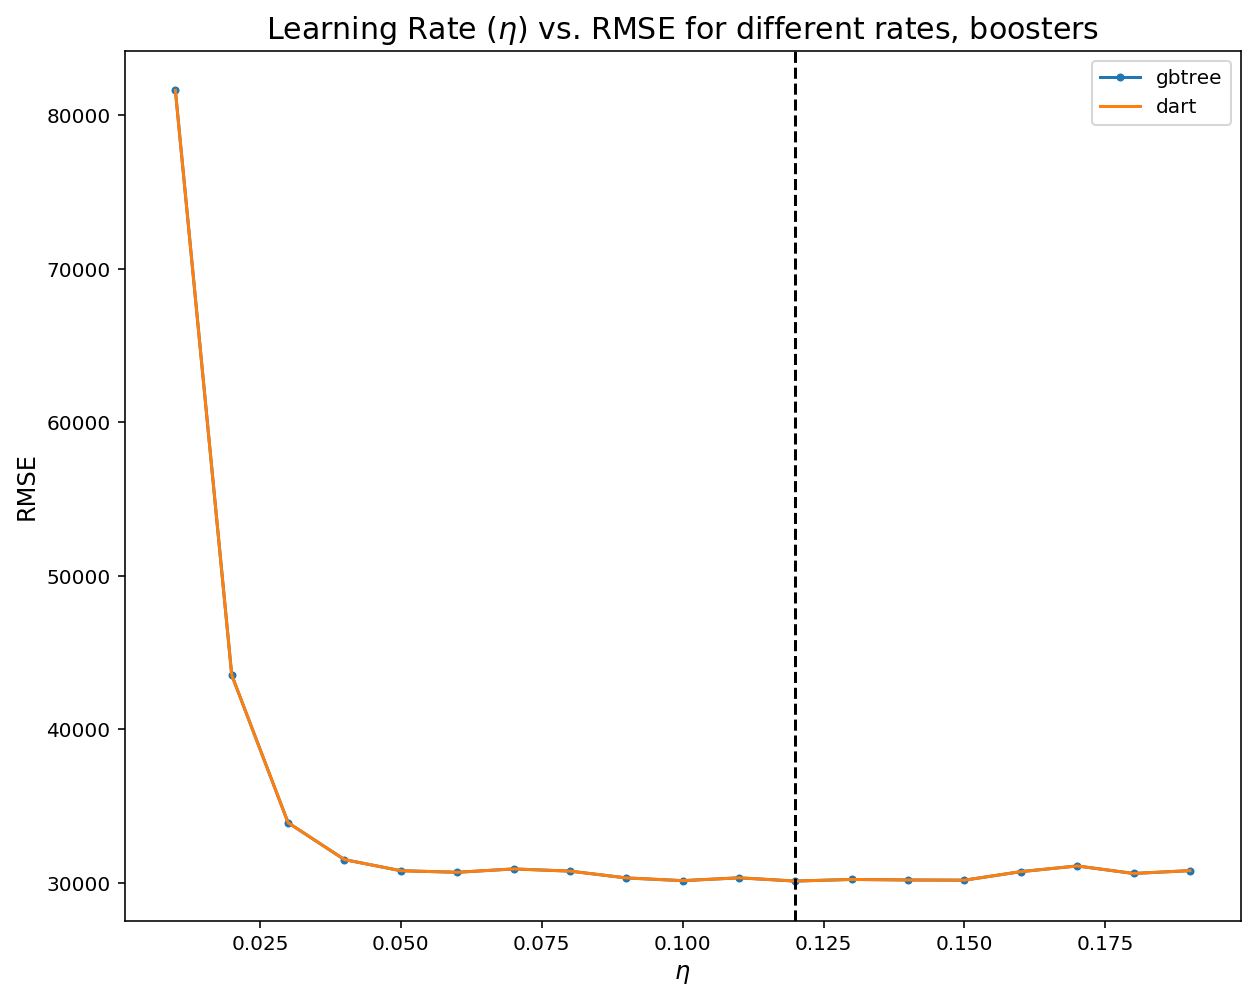

In [21]:
plt.figure(figsize = (10,8))
_ = plt.plot(etas, cv_xgboost[0,:], marker='.', label = boosters[0])
_ = plt.plot(etas, cv_xgboost[1,:], marker=',', label = boosters[1])
plt.xlabel("$\eta$", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
xposition = etas[np.argmin(cv_xgboost[1,:])]
plt.axvline(x=xposition, color='k', linestyle='--')
        #plt.text(xposition + 0.08, 0.1375, 'Minimum Alpha', rotation=0)
_ = plt.title("Learning Rate ($\eta$) vs. RMSE for different rates, boosters", fontsize=15)
_ = plt.legend()
print(xposition)

In [22]:
model = XGBRegressor(learning_rate=0.12, booster='dart')
_ = model.fit(X_train, y)

In [23]:
_ = model.predict(X_test)
new_index = np.arange(1461,2920,1)

index = pd.DataFrame(new_index, columns=['Id'])
y_hat = pd.DataFrame(_, columns=['SalePrice'])
frames = [index, y_hat]
pred = pd.concat(frames, axis=1)
pred.head()

,Id,SalePrice
0,1461,129776.914062
1,1462,141023.125000
2,1463,163525.484375
3,1464,178384.703125
4,1465,208871.890625


In [24]:
filename = 'prediction-xgb.csv'
pred.to_csv(filename, encoding='utf-8', index=False)

## Ensemble and Stacking

In [25]:
# Build base model
model_ridge_2 = Ridge(alpha=0.01899, normalize=True)
model_ridge_2.fit(X_train, y)
y_hat_2 = model_ridge_2.predict(X_train)

In [27]:
## Feed the base model back into another Ridge
y_hat_2 = pd.DataFrame(y_hat_2, columns=['Ridge'])
frames = [X_train, y_hat_2]
X_train_stacked = pd.concat(frames,axis =1)
_ = model_ridge_2.fit(X_train_stacked,y)

# append ones for the new column
ones = pd.DataFrame(np.ones((1459)))
frames = [X_test, ones]
X_test_stacked = pd.concat(frames, axis=1)
y_hat_3 = model_ridge_2.predict(X_test_stacked)

In [28]:
filename = 'prediction-stacked.csv'
pred.to_csv(filename, encoding='utf-8', index=False)

#### Best Scores
<ul>
    <li>Ridge: 0.16355</li>
    <li>Lasso: 0.25405</li>
    <li>XGB: 0.16584</li>
    <li>Ensemble: 0.25405 </li>
</ul>